### Read Data

In [2]:
import pandas as pd 

# Read in the data
df = pd.read_csv('./psi-jogja-2021.csv')
df.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,0:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,1:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,2:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,3:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,4:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good


### Mean, Median, Standar Deviasi, Variance

In [4]:
nama_kolom = ['PM10', 'SO2', 'CO', 'O3', 'NO2', 'PM2.5']

statistics = {
	"Mean": df[nama_kolom].mean().round(2),
    "Median": df[nama_kolom].median().round(2),
    "Standar Deviasi": df[nama_kolom].std().round(2),
    "Variance": df[nama_kolom].var().round(2),
}

for measure in statistics:
	print(f"Statistik {measure}")
	print(statistics[measure])
	print()

Statistik Mean
PM10     20.92
SO2      12.73
CO       14.19
O3       22.15
NO2       4.42
PM2.5    36.12
dtype: float64

Statistik Median
PM10     18.0
SO2      15.0
CO       12.0
O3       20.0
NO2       4.0
PM2.5    35.0
dtype: float64

Statistik Standar Deviasi
PM10     11.53
SO2      11.39
CO        7.25
O3       19.03
NO2       2.42
PM2.5    19.94
dtype: float64

Statistik Variance
PM10     132.84
SO2      129.63
CO        52.52
O3       361.98
NO2        5.85
PM2.5    397.55
dtype: float64



### Quartile and IQR

In [8]:
quartiles = [0.25, 0.5, 0.75]

statistics = {}

for column in nama_kolom:
    column_statistics = {}
    for q in quartiles:
        column_statistics[f"Kuartil {q * 100}"] = (
            df[column].quantile(q).round(2)
        )
    column_statistics["IQR"] = (
        column_statistics[f"Kuartil {quartiles[2] * 100}"]
        - column_statistics[f"Kuartil {quartiles[0] * 100}"]
    ).round(3)
    statistics[column] = column_statistics
    
for column, column_statistics in statistics.items():
    print(f"Statistics for {column}:")
    for measure, value in column_statistics.items():
        print(f"{measure}: {value}")
    print()

Statistics for PM10:
Kuartil 25.0: 13.0
Kuartil 50.0: 18.0
Kuartil 75.0: 25.0
IQR: 12.0

Statistics for SO2:
Kuartil 25.0: 0.0
Kuartil 50.0: 15.0
Kuartil 75.0: 20.0
IQR: 20.0

Statistics for CO:
Kuartil 25.0: 8.0
Kuartil 50.0: 12.0
Kuartil 75.0: 20.0
IQR: 12.0

Statistics for O3:
Kuartil 25.0: 4.0
Kuartil 50.0: 20.0
Kuartil 75.0: 36.0
IQR: 32.0

Statistics for NO2:
Kuartil 25.0: 3.0
Kuartil 50.0: 4.0
Kuartil 75.0: 6.0
IQR: 3.0

Statistics for PM2.5:
Kuartil 25.0: 21.0
Kuartil 50.0: 35.0
Kuartil 75.0: 53.0
IQR: 32.0



### Plotting Histogram

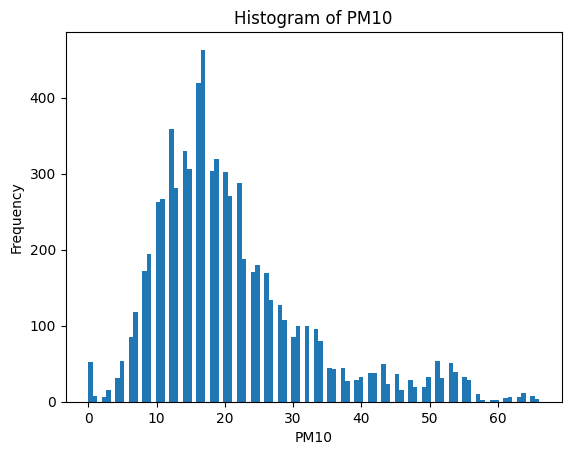

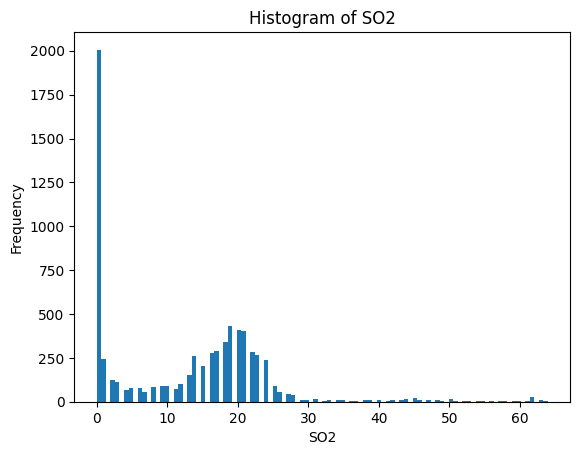

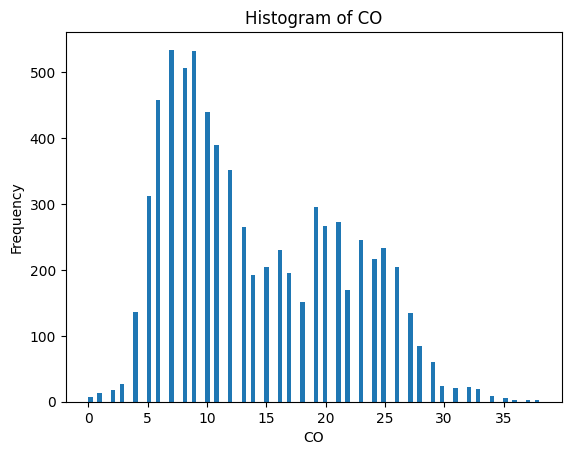

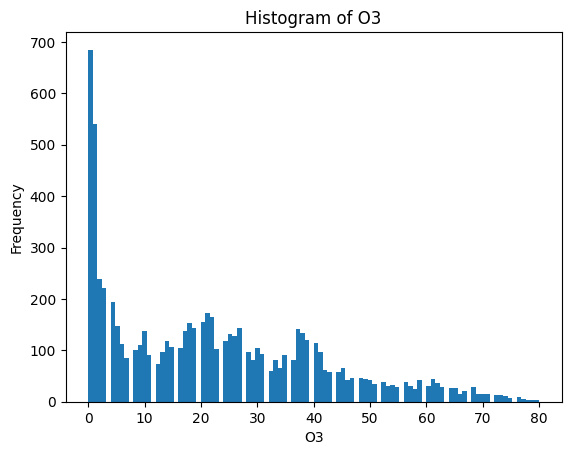

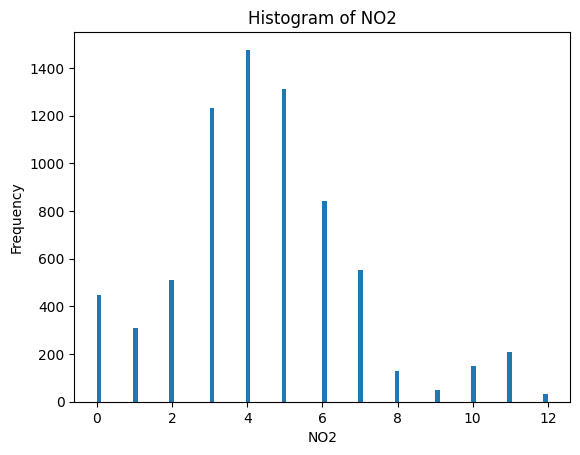

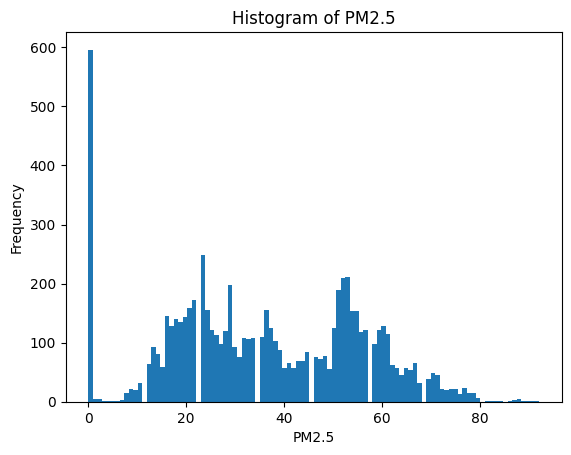

In [13]:
import matplotlib.pyplot as plt

data = {
	'PM10' : df['PM10'],
	'SO2' : df['SO2'],
	'CO' : df['CO'],
	'O3' : df['O3'],
	'NO2' : df['NO2'],
	'PM2.5' : df['PM2.5'],
}

for column in df.columns:
    plt.hist(df[column], bins=no_bins)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### KS Test

In [16]:
from scipy.stats import kstest

alpha = 0.05
nama_kolom = ['PM10', 'SO2', 'CO', 'O3', 'NO2', 'PM2.5']

for nama_kolom in nama_kolom:
    # Melakukan uji normalitas dengan KS Test
    ks_statistic, p_value = kstest(df[nama_kolom], 'norm')

    # Membandingkan nilai p_value dan alpha
    if p_value < alpha:
        hasil = "Tidak Mengikuti Distribusi Normal"
    else:
        hasil = "Mengikuti Distribusi Normal"

    # Menampilkan hasil
    print("Hasil Uji KS kolom", nama_kolom)
    print("KS statistic:", ks_statistic)
    print("P-value:", p_value)
    print("Alpha:", alpha)
    print("Hasil:", hasil)
    print()

Hasil Uji KS kolom PM10
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom SO2
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom CO
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom O3
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom NO2
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

Hasil Uji KS kolom PM2.5
KS statistic: nan
P-value: nan
Alpha: 0.05
Hasil: Mengikuti Distribusi Normal

